# Predicting Wine Quality

This project is aimed at predicting the quality of red and white variants of the Portuguese "Vinho Verde" wine on the scale of 0 to 10.

The data is retrived from internet https://drive.google.com/file/d/1pW85WoyJnWyLo8FlNEL4UDtkvoaxFI1Z/view?usp=sharing\


Main python library used are:

1) Numpy

2) Pandas

3) Matplotlib

4) Seaborn

5) Sklearn



Steps involved are:

1) Importing dataset and Cleaning it

2) Performing EDA using pandas

3) Visualizing different features from the dataset

4) Feature Engineering

5) Modeling

6) Predicting

7) Comparing Accuracy



Machine Learning Models used:

1) Support Vector Classifier

2) Naive bayes

3) Decision Trees

4) Random Forest

5) KNeighborsClassifier

6) Bagging Classifier


In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importing dataset and Cleaning

In [117]:
wine = pd.read_csv("D:/Acadview training notes/winequality.csv")

In [118]:
wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,red
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,0,red
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,0,red
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,1,red
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,1,red
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,0,red


In [119]:
# Checking missing values
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
good                    0
color                   0
dtype: int64

# Performing EDA using pandas

In [120]:
X = wine.loc[:,['volatile acidity','citric acid','chlorides','sulphates','total sulfur dioxide','free sulfur dioxide','pH','alcohol','good']]
y = wine.loc[:,'quality']

In [121]:
X.describe()

,volatile acidity,citric acid,chlorides,sulphates,total sulfur dioxide,free sulfur dioxide,pH,alcohol,good
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,0.339666,0.318633,0.056034,0.531268,115.744574,30.525319,3.218501,10.491801,0.196552
std,0.164636,0.145318,0.035034,0.148806,56.521855,17.749400,0.160787,1.192712,0.397421
min,0.080000,0.000000,0.009000,0.220000,6.000000,1.000000,2.720000,8.000000,0.000000
25%,0.230000,0.250000,0.038000,0.430000,77.000000,17.000000,3.110000,9.500000,0.000000
50%,0.290000,0.310000,0.047000,0.510000,118.000000,29.000000,3.210000,10.300000,0.000000
75%,0.400000,0.390000,0.065000,0.600000,156.000000,41.000000,3.320000,11.300000,0.000000
max,1.580000,1.660000,0.611000,2.000000,440.000000,289.000000,4.010000,14.900000,1.000000


In [122]:
y.describe()

count    6497.000000
mean        5.818378
std         0.873255
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64

# Visualization and Correlation

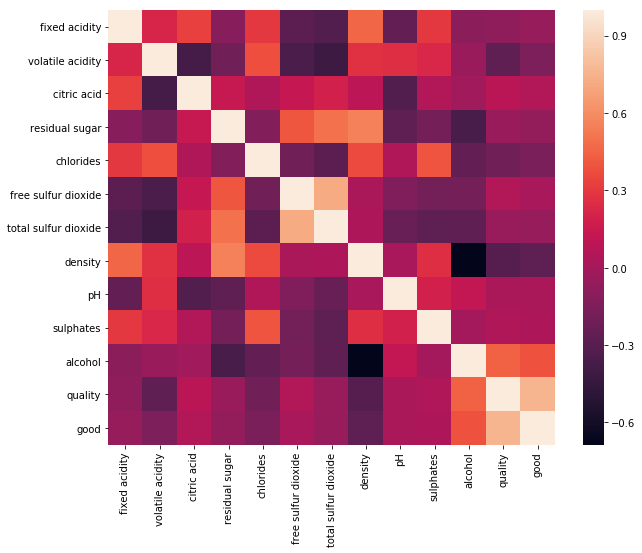

In [123]:
plt.figure(figsize=(10,8))
corr = wine.corr()
sns.heatmap(corr)

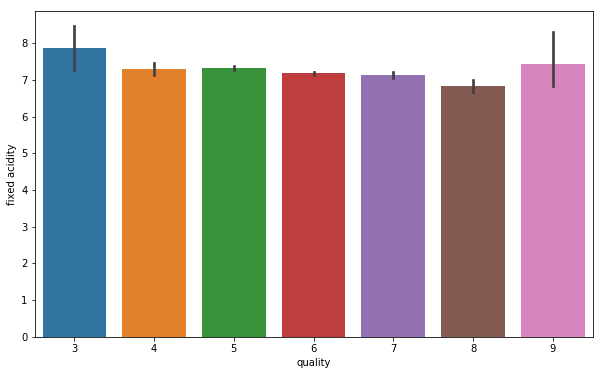

In [124]:
#Here we see that fixed acidity does not give any specification to classify the quality.
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = wine)

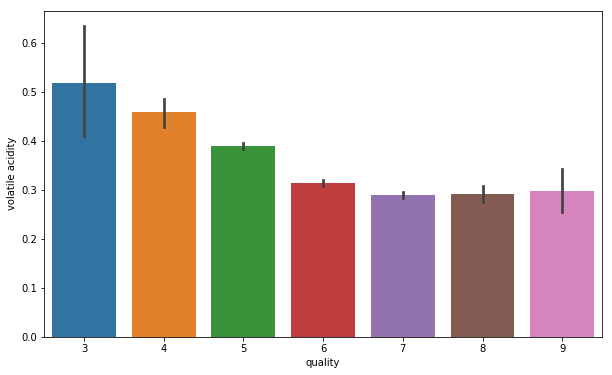

In [125]:
#Here we see that its quite a downing trend in the volatile acidity as we go higher the quality 
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = wine)

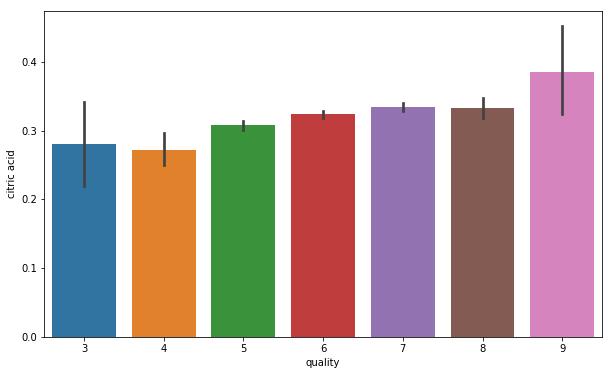

In [126]:
#Composition of citric acid go higher as we go higher in the quality of the wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = wine)

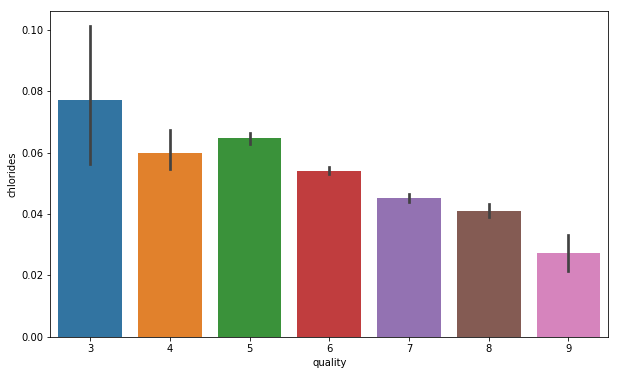

In [127]:
#Composition of chloride also go down as we go higher in the quality of the wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = wine)

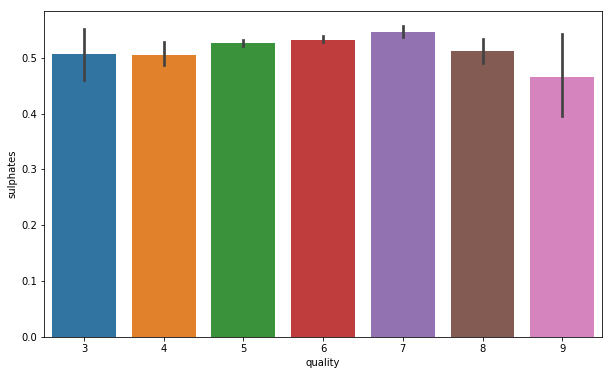

In [128]:
#Sulphates level goes higher with the quality of wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = wine)

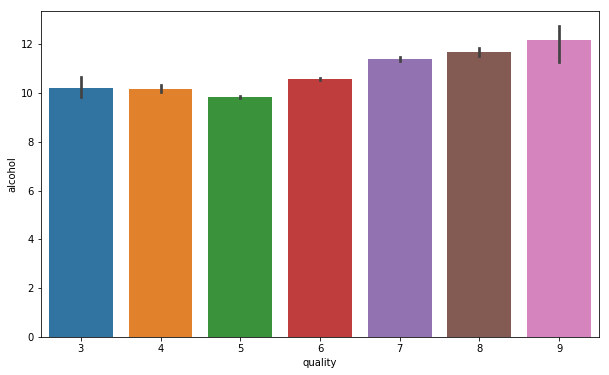

In [129]:
#Alcohol level also goes higher as te quality of wine increases
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = wine)

In [130]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
def model_accuracy(y_true,pred):
    print("1) Accuracy score = ",metrics.accuracy_score(y_true,pred)*100,"%")
    print("2) Confusion matrix : \n",confusion_matrix(y_true,pred))
    print("3) Classification report : \n",classification_report(y_true,pred))

In [131]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=3)

# Support Vector Classifier

In [132]:
from sklearn.svm import SVC

In [133]:
svc = SVC()
svc.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [134]:
y_pred = svc.predict(X_test)

In [135]:
model_accuracy(y_test,y_pred)

1) Accuracy score =  60.8205128205 %
2) Confusion matrix : 
 [[  0   0   5   2   0   0   0]
 [  0   0  24  37   0   0   0]
 [  0   0 345 296   1   0   0]
 [  0   0 182 653  10   0   0]
 [  0   0  24 126 184   0   0]
 [  0   0   4  21  30   4   0]
 [  0   0   0   1   1   0   0]]
3) Classification report : 
              precision    recall  f1-score   support

          3       0.00      0.00      0.00         7
          4       0.00      0.00      0.00        61
          5       0.59      0.54      0.56       642
          6       0.57      0.77      0.66       845
          7       0.81      0.55      0.66       334
          8       1.00      0.07      0.13        59
          9       0.00      0.00      0.00         2

avg / total       0.61      0.61      0.59      1950



C:\Users\Divyalaptus\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Naive Bayes Classifier

In [136]:
from sklearn.naive_bayes import BernoulliNB

In [137]:
mnb = BernoulliNB()

In [138]:
mnb.fit(X_train,y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [139]:
pred = mnb.predict(X_test)

In [140]:
model_accuracy(y_test,pred)

1) Accuracy score =  60.2051282051 %
2) Confusion matrix : 
 [[  0   0   0   7   0   0   0]
 [  0   0   5  56   0   0   0]
 [  0   0  18 624   0   0   0]
 [  0   0  23 822   0   0   0]
 [  0   0   0   0 334   0   0]
 [  0   0   0   0  59   0   0]
 [  0   0   0   0   2   0   0]]
3) Classification report : 
              precision    recall  f1-score   support

          3       0.00      0.00      0.00         7
          4       0.00      0.00      0.00        61
          5       0.39      0.03      0.05       642
          6       0.54      0.97      0.70       845
          7       0.85      1.00      0.92       334
          8       0.00      0.00      0.00        59
          9       0.00      0.00      0.00         2

avg / total       0.51      0.60      0.48      1950



C:\Users\Divyalaptus\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Decision Tree Classifier

In [141]:
from sklearn.tree import DecisionTreeClassifier

In [142]:
dtc = DecisionTreeClassifier()

In [143]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [144]:
pre = dtc.predict(X_test)

In [145]:
model_accuracy(y_test,pre)

1) Accuracy score =  70.1538461538 %
2) Confusion matrix : 
 [[  0   2   5   0   0   0   0]
 [  1  15  27  18   0   0   0]
 [  2  27 407 206   0   0   0]
 [  5  23 196 621   0   0   0]
 [  0   0   0   0 291  43   0]
 [  0   0   0   0  25  34   0]
 [  0   0   0   0   1   1   0]]
3) Classification report : 
              precision    recall  f1-score   support

          3       0.00      0.00      0.00         7
          4       0.22      0.25      0.23        61
          5       0.64      0.63      0.64       642
          6       0.73      0.73      0.73       845
          7       0.92      0.87      0.89       334
          8       0.44      0.58      0.50        59
          9       0.00      0.00      0.00         2

avg / total       0.71      0.70      0.70      1950



C:\Users\Divyalaptus\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# KNeighborsClassifier

In [146]:
from sklearn.neighbors import KNeighborsClassifier

In [147]:
knn = KNeighborsClassifier()

In [148]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [149]:
pred = knn.predict(X_test)

In [150]:
model_accuracy(y_test,pred)

1) Accuracy score =  51.4871794872 %
2) Confusion matrix : 
 [[  0   0   5   1   1   0   0]
 [  0   6  29  25   1   0   0]
 [  2   8 358 261  11   2   0]
 [  0  10 288 508  35   4   0]
 [  0   0  59 145 127   3   0]
 [  1   0   8  27  18   5   0]
 [  0   0   0   1   1   0   0]]
3) Classification report : 
              precision    recall  f1-score   support

          3       0.00      0.00      0.00         7
          4       0.25      0.10      0.14        61
          5       0.48      0.56      0.52       642
          6       0.52      0.60      0.56       845
          7       0.65      0.38      0.48       334
          8       0.36      0.08      0.14        59
          9       0.00      0.00      0.00         2

avg / total       0.52      0.51      0.50      1950



C:\Users\Divyalaptus\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Random Forest Classifier

In [151]:
from sklearn.ensemble import RandomForestClassifier

In [152]:
clf = RandomForestClassifier(n_jobs=8)

In [153]:
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=8,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [154]:
pred=clf.predict(X_test)

In [155]:
model_accuracy(y_test,pred)

1) Accuracy score =  75.3846153846 %
2) Confusion matrix : 
 [[  0   1   3   3   0   0   0]
 [  0  11  28  22   0   0   0]
 [  0   9 452 181   0   0   0]
 [  0   4 183 658   0   0   0]
 [  0   0   0   0 327   7   0]
 [  0   0   0   0  37  22   0]
 [  0   0   0   0   1   1   0]]
3) Classification report : 
              precision    recall  f1-score   support

          3       0.00      0.00      0.00         7
          4       0.44      0.18      0.26        61
          5       0.68      0.70      0.69       642
          6       0.76      0.78      0.77       845
          7       0.90      0.98      0.94       334
          8       0.73      0.37      0.49        59
          9       0.00      0.00      0.00         2

avg / total       0.74      0.75      0.74      1950



C:\Users\Divyalaptus\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Bagging Classifier

In [156]:
from sklearn import model_selection

In [157]:
from sklearn.ensemble import BaggingClassifier

In [158]:
from sklearn.tree import DecisionTreeClassifier

In [159]:
kfold = model_selection.KFold(n_splits=10,random_state = 7)

In [160]:
cart = DecisionTreeClassifier()

In [161]:
model1 = BaggingClassifier(base_estimator = cart,n_estimators=100,random_state = 7)

In [162]:
results = model_selection.cross_val_score(model1,X,y,cv=kfold)

In [163]:
print(results.mean())

0.679875548181


Hence from the above all the models applied we get 75.43% accuracy from random forest